In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import our dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [3]:
# Import our input dataset

# Load the file
file_path = Path('FINAL_NYC_restaurants_full_database.csv')
# Read into a dataFrame
df = pd.read_csv(file_path)
# Show dataFrame
df.head()

,DBA,STREET,INCOME_LEVEL,BOROUGH,ZIPCODE,CUISINE_DESCRIPTION,SCORE,GRADE
0,PATHOS,1 AVENUE,high income,Manhattan,10022,Mediterranean,9,A
1,THE LITTLE BEET,PARK AVENUE,high income,Manhattan,10017,Salads,13,A
2,AMAZE FUSION & LOUNGE,3 AVENUE,high income,Manhattan,10017,Asian/Asian Fusion,27,B
3,NOURISH THAI,VANDERBILT AVENUE,medium income,Brooklyn,11238,Thai,9,A
4,ESSEN,MADISON AVENUE,high income,Manhattan,10017,Sandwiches,13,A


In [4]:
print(df.dtypes)

DBA                    object
STREET                 object
INCOME_LEVEL           object
BOROUGH                object
ZIPCODE                 int64
CUISINE_DESCRIPTION    object
SCORE                   int64
GRADE                  object
dtype: object


In [5]:
# Convert column for ZIPCODE from data type 'int' to str':
df['ZIPCODE'] = df['ZIPCODE'].astype(str)

print(df.dtypes)

DBA                    object
STREET                 object
INCOME_LEVEL           object
BOROUGH                object
ZIPCODE                object
CUISINE_DESCRIPTION    object
SCORE                   int64
GRADE                  object
dtype: object


In [6]:
# Determine different grades under 'GRADE' column
df['GRADE'].value_counts()

A    7033
B     691
C     222
P     138
Z      90
N      50
Name: GRADE, dtype: int64

In [7]:
# Drop the grades 'N', 'P', and 'Z'
df.drop(df[(df['GRADE'] == 'N') | (df['GRADE'] == 'P') | (df['GRADE'] == 'Z')].index, inplace = True)

In [8]:
# Determine different grades under 'GRADE' column
df['GRADE'].value_counts()

A    7033
B     691
C     222
Name: GRADE, dtype: int64

# Preprocessing

## Normalizing the Categorical Variables

In [9]:
# # Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df[df_cat].nunique()

DBA                    2932
STREET                  484
INCOME_LEVEL              3
BOROUGH                   5
ZIPCODE                  78
CUISINE_DESCRIPTION      69
GRADE                     3
dtype: int64

In [10]:
# Check the unique value counts to see if binning is required
DBA_counts = df.DBA.value_counts()
print(DBA_counts)

STARBUCKS                 216
MCDONALD'S                136
SUBWAY                    119
KENNEDY FRIED CHICKEN      59
CHIPOTLE MEXICAN GRILL     44
                         ... 
ART BIRD & WHISKEY BAR      1
THE HARBOR LIGHT PUB        1
ANGELO BELLINI              1
BAYARD SUSHI                1
SOHO EATERY                 1
Name: DBA, Length: 2932, dtype: int64


In [11]:
STREET_counts = df.STREET.value_counts()
print(STREET_counts)

2 AVENUE               356
1 AVENUE               334
3 AVENUE               311
BROADWAY               270
LEXINGTON AVENUE       255
                      ... 
35TH ST                  1
B  100 STREET            1
ROCKAWAY BEACH BLVD      1
CLAREMONT PARKWAY        1
E 180TH ST               1
Name: STREET, Length: 484, dtype: int64


In [12]:
ZIPCODE_counts = df.ZIPCODE.value_counts()
print(ZIPCODE_counts)

10013    810
10022    773
10017    564
10009    474
11238    419
        ... 
11233      2
11435      2
11206      1
10473      1
11208      1
Name: ZIPCODE, Length: 78, dtype: int64


In [13]:
CUISINE_DESCRIPTION_counts = df.CUISINE_DESCRIPTION.value_counts()
print(CUISINE_DESCRIPTION_counts)

American            1732
Coffee/Tea           692
Chinese              682
Italian              536
Pizza                407
                    ... 
Portuguese             2
Cajun                  1
Russian                1
Hotdogs/Pretzels       1
Lebanese               1
Name: CUISINE_DESCRIPTION, Length: 69, dtype: int64


<AxesSubplot:ylabel='Density'>

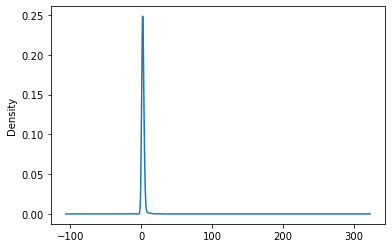

In [14]:
# Visualize the value counts
DBA_counts.plot.density()

In [15]:
# Determine which values to replace
replace_DBA = list(DBA_counts[DBA_counts < 5].index)

# Replace in DataFrame
for DBA in replace_DBA:
    df.DBA = df.DBA.replace(DBA,"Other")


# Check to make sure binning was successful
df.DBA.value_counts()

Other                                 6123
STARBUCKS                              216
MCDONALD'S                             136
SUBWAY                                 119
KENNEDY FRIED CHICKEN                   59
                                      ... 
EL PORTON BAR & MEXICAN RESTAURANT       5
MEZCLA DE SABORES RESTAURANT             5
SUSHI REN                                5
HAINA RESTAURANT                         5
PHO SAIGON                               5
Name: DBA, Length: 190, dtype: int64

<AxesSubplot:ylabel='Density'>

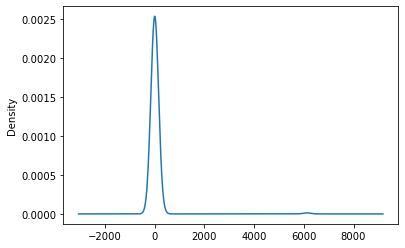

In [16]:
# Visualize the new value counts
DBA_counts_new = df.DBA.value_counts()
DBA_counts_new.plot.density()

<AxesSubplot:ylabel='Density'>

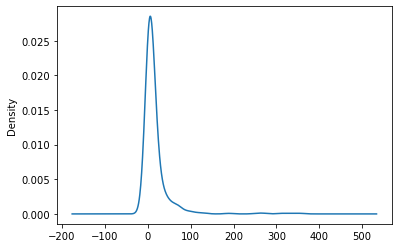

In [17]:
# Visualize the value counts
STREET_counts.plot.density()

In [18]:
# Determine which values to replace
replace_STREET = list(STREET_counts[STREET_counts < 30].index)

# Replace in DataFrame
for STREET in replace_STREET:
    df.STREET = df.STREET.replace(STREET,"Other")


# Check to make sure binning was successful
df.STREET.value_counts()

Other                3047
2 AVENUE              356
1 AVENUE              334
3 AVENUE              311
BROADWAY              270
                     ... 
BAYARD STREET          33
EAST    7 STREET       33
BOWERY                 32
KISSENA BOULEVARD      30
5 AVENUE               30
Name: STREET, Length: 62, dtype: int64

<AxesSubplot:ylabel='Density'>

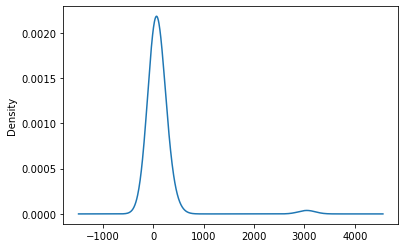

In [19]:
# Visualize the new value counts
STREET_counts_new = df.STREET.value_counts()
STREET_counts_new.plot.density()

<AxesSubplot:ylabel='Density'>

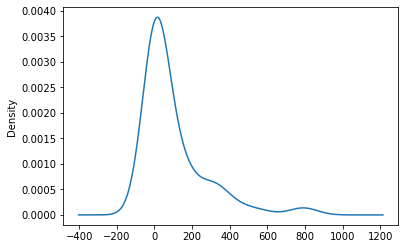

In [20]:
# Visualize the value counts
ZIPCODE_counts.plot.density()

In [21]:
# Determine which values to replace
replace_ZIPCODE = list(ZIPCODE_counts[ZIPCODE_counts < 200].index)

# Replace in DataFrame
for ZIPCODE in replace_ZIPCODE:
    df.ZIPCODE = df.ZIPCODE.replace(ZIPCODE,"Other")


# Check to make sure binning was successful
df.ZIPCODE.value_counts()

Other    2161
10013     810
10022     773
10017     564
10009     474
11238     419
11101     372
10028     344
10023     321
11375     315
10021     315
11355     311
10024     284
10065     280
10452     203
Name: ZIPCODE, dtype: int64

<AxesSubplot:ylabel='Density'>

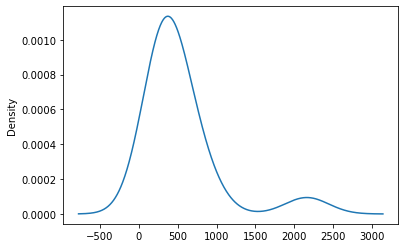

In [22]:
# Visualize the new value counts
ZIPCODE_counts_new = df.ZIPCODE.value_counts()
ZIPCODE_counts_new.plot.density()

<AxesSubplot:ylabel='Density'>

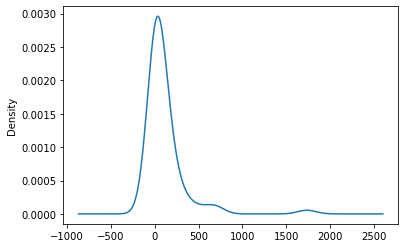

In [23]:
# Visualize the value counts
CUISINE_DESCRIPTION_counts.plot.density()

In [24]:
# Determine which values to replace
replace_CUISINE_DESCRIPTION = list(CUISINE_DESCRIPTION_counts[CUISINE_DESCRIPTION_counts < 250].index)

# Replace in DataFrame
for CUISINE_DESCRIPTION in replace_CUISINE_DESCRIPTION:
    df.CUISINE_DESCRIPTION = df.CUISINE_DESCRIPTION.replace(CUISINE_DESCRIPTION,"Other")


# Check to make sure binning was successful
df.CUISINE_DESCRIPTION.value_counts()

Other             2997
American          1732
Coffee/Tea         692
Chinese            682
Italian            536
Pizza              407
Japanese           360
Sandwiches         275
Latin American     265
Name: CUISINE_DESCRIPTION, dtype: int64

<AxesSubplot:ylabel='Density'>

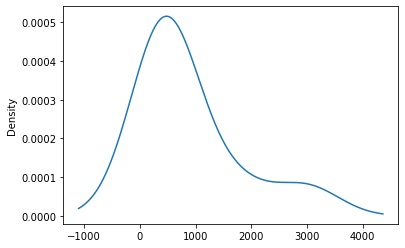

In [25]:
# Visualize the new value counts
CUISINE_DESCRIPTION_counts_new = df.CUISINE_DESCRIPTION.value_counts()
CUISINE_DESCRIPTION_counts_new.plot.density()

In [26]:
# # Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
df[df_cat].nunique()

DBA                    190
STREET                  62
INCOME_LEVEL             3
BOROUGH                  5
ZIPCODE                 15
CUISINE_DESCRIPTION      9
GRADE                    3
dtype: int64

## Encoding the Variables

### Encoding the variable 'GRADE'

In [27]:
# Creating a 'high' and 'low' grade

# Creating an instance of label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["Grade"] = label_encoder.fit_transform(df["GRADE"])
df.head()

,DBA,STREET,INCOME_LEVEL,BOROUGH,ZIPCODE,CUISINE_DESCRIPTION,SCORE,GRADE,Grade
0,Other,1 AVENUE,high income,Manhattan,10022,Other,9,A,0
1,THE LITTLE BEET,PARK AVENUE,high income,Manhattan,10017,Other,13,A,0
2,AMAZE FUSION & LOUNGE,3 AVENUE,high income,Manhattan,10017,Other,27,B,1
3,Other,VANDERBILT AVENUE,medium income,Brooklyn,11238,Other,9,A,0
4,Other,MADISON AVENUE,high income,Manhattan,10017,Sandwiches,13,A,0


In [28]:
# Grade dictionary
## The dictionary creates two categories for grades: "high" and "low".
## "high" grade has been made to replace grades A and B, 
## whereas "low" grade has been made to replace all grades lower than A and B.

GRADE_num = {
    "A": "high",
    "B": "high",
    "C": "low",
}

In [29]:
# Grades encoded using the dictionary values
df["GRADE_num"] = df["GRADE"].apply(lambda x: GRADE_num[x])
df.head()

,DBA,STREET,INCOME_LEVEL,BOROUGH,ZIPCODE,CUISINE_DESCRIPTION,SCORE,GRADE,Grade,GRADE_num
0,Other,1 AVENUE,high income,Manhattan,10022,Other,9,A,0,high
1,THE LITTLE BEET,PARK AVENUE,high income,Manhattan,10017,Other,13,A,0,high
2,AMAZE FUSION & LOUNGE,3 AVENUE,high income,Manhattan,10017,Other,27,B,1,high
3,Other,VANDERBILT AVENUE,medium income,Brooklyn,11238,Other,9,A,0,high
4,Other,MADISON AVENUE,high income,Manhattan,10017,Sandwiches,13,A,0,high


In [30]:
# Drop the GRADE and Grade columns
df = df.drop(["GRADE", "Grade"], axis=1)
df.head()

,DBA,STREET,INCOME_LEVEL,BOROUGH,ZIPCODE,CUISINE_DESCRIPTION,SCORE,GRADE_num
0,Other,1 AVENUE,high income,Manhattan,10022,Other,9,high
1,THE LITTLE BEET,PARK AVENUE,high income,Manhattan,10017,Other,13,high
2,AMAZE FUSION & LOUNGE,3 AVENUE,high income,Manhattan,10017,Other,27,high
3,Other,VANDERBILT AVENUE,medium income,Brooklyn,11238,Other,9,high
4,Other,MADISON AVENUE,high income,Manhattan,10017,Sandwiches,13,high


In [31]:
# # Generate our categorical variable list again
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column again
df[df_cat].nunique()

DBA                    190
STREET                  62
INCOME_LEVEL             3
BOROUGH                  5
ZIPCODE                 15
CUISINE_DESCRIPTION      9
GRADE_num                2
dtype: int64

### Encoding the Categorical Variables

In [32]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(df_cat)
encode_df.head()

,DBA_16 HANDLES,DBA_AA CHINESE RESTAURANT,DBA_AL HORNO LEAN MEXICAN,DBA_AMAZE FUSION & LOUNGE,DBA_AMC THEATRES,DBA_AMERICAN CUT,DBA_ANEJO TRIBECA,DBA_APPLEBEE'S,DBA_ASIAN 59,DBA_BAREBURGER,...,CUISINE_DESCRIPTION_Chinese,CUISINE_DESCRIPTION_Coffee/Tea,CUISINE_DESCRIPTION_Italian,CUISINE_DESCRIPTION_Japanese,CUISINE_DESCRIPTION_Latin American,CUISINE_DESCRIPTION_Other,CUISINE_DESCRIPTION_Pizza,CUISINE_DESCRIPTION_Sandwiches,GRADE_num_high,GRADE_num_low
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [33]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat,1)
df.head()

,SCORE,DBA_16 HANDLES,DBA_AA CHINESE RESTAURANT,DBA_AL HORNO LEAN MEXICAN,DBA_AMAZE FUSION & LOUNGE,DBA_AMC THEATRES,DBA_AMERICAN CUT,DBA_ANEJO TRIBECA,DBA_APPLEBEE'S,DBA_ASIAN 59,...,CUISINE_DESCRIPTION_Chinese,CUISINE_DESCRIPTION_Coffee/Tea,CUISINE_DESCRIPTION_Italian,CUISINE_DESCRIPTION_Japanese,CUISINE_DESCRIPTION_Latin American,CUISINE_DESCRIPTION_Other,CUISINE_DESCRIPTION_Pizza,CUISINE_DESCRIPTION_Sandwiches,GRADE_num_high,GRADE_num_low
0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,27,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Splitting the Data, and Standardizing the Numerical Variables

In [34]:
# Remove GRADE_num target from features data
y = df.GRADE_num_high
X = df.drop(columns=["GRADE_num_high","GRADE_num_low"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Resampling Models

## Oversampling: Naive Random Oversampling 

In [35]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_resampled)

Counter({1.0: 5598, 0.0: 5598})

In [36]:
y_resampled.shape

(11196,)

In [37]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [38]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred

array([0., 1., 1., ..., 1., 0., 1.])

In [39]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.671


In [40]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  23,   30],
       [ 601, 1266]])

In [41]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.04      0.43      0.68      0.07      0.54      0.29        53
        1.0       0.98      0.68      0.43      0.80      0.54      0.30      1867

avg / total       0.95      0.67      0.44      0.78      0.54      0.30      1920



## Oversampling: SMOTE Oversampling

In [42]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy='auto').fit_resample(
    X_train_scaled, y_train
)

Counter(y_resampled)

Counter({1.0: 5598, 0.0: 5598})

In [43]:
y_resampled.shape

(11196,)

In [44]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [45]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred

array([0., 1., 1., ..., 1., 0., 1.])

In [46]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.685


In [47]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[  22,   31],
       [ 573, 1294]])

In [48]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.04      0.42      0.69      0.07      0.54      0.28        53
        1.0       0.98      0.69      0.42      0.81      0.54      0.30      1867

avg / total       0.95      0.69      0.42      0.79      0.54      0.30      1920



## Undersampling: Cluster Centroids

In [49]:
# Resample the data using the ClusterCentroids resampler
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({0.0: 159, 1.0: 159})

In [50]:
y_resampled.shape

(318,)

In [51]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [52]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred

array([0., 1., 1., ..., 1., 0., 0.])

In [53]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.432


In [54]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  34,   19],
       [1071,  796]])

In [55]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.03      0.64      0.43      0.06      0.52      0.28        53
        1.0       0.98      0.43      0.64      0.59      0.52      0.27      1867

avg / total       0.95      0.43      0.64      0.58      0.52      0.27      1920



## Combination (Over and Under) Sampling: SMOTEENN

In [56]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({0.0: 5008, 1.0: 5043})

In [57]:
y_resampled.shape

(10051,)

In [58]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [59]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
y_pred

array([0., 1., 1., ..., 1., 1., 1.])

In [60]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.682


In [61]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[  21,   32],
       [ 578, 1289]])

In [62]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.04      0.40      0.69      0.06      0.52      0.27        53
        1.0       0.98      0.69      0.40      0.81      0.52      0.28      1867

avg / total       0.95      0.68      0.40      0.79      0.52      0.28      1920



# Ensemble Learning Models

## Random Forest Classifier

In [63]:
# Create a random forest classifier.
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

In [64]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

Counter(y_train)

Counter({1.0: 5598, 0.0: 159})

In [65]:
y_train.shape

(5757,)

In [66]:
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [67]:
# Calculated the accuracy score
acc_score = accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.964


In [68]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2,51
Actual 1,18,1849


In [69]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.10      0.04      0.99      0.05      0.19      0.03        53
        1.0       0.97      0.99      0.04      0.98      0.19      0.04      1867

avg / total       0.95      0.96      0.06      0.96      0.19      0.04      1920



## Balanced Random Forest Classifier

In [70]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
# Create a balanced random forest classifier:
brf_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

In [71]:
# Fitting the model:
brf_model = brf_model.fit(X_train_scaled, y_train)
Counter(y_train)

Counter({1.0: 5598, 0.0: 159})

In [72]:
y_train.shape

(5757,)

In [73]:
# Making predictions using the testing data:
y_pred = brf_model.predict(X_test_scaled)
y_pred

array([0., 1., 0., ..., 1., 1., 1.])

In [74]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.566


In [75]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,26,27
Actual 1,807,1060


In [76]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.03      0.49      0.57      0.06      0.53      0.28        53
        1.0       0.98      0.57      0.49      0.72      0.53      0.28      1867

avg / total       0.95      0.57      0.49      0.70      0.53      0.28      1920



In [77]:
# List the features sorted in descending order by feature importance
# Calculate feature importance in the Balanced Random Forest model.
importances = brf_model.feature_importances_
importances

# We can sort the features by their importance.
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)

[(0.2290779931355462, 'SCORE'),
 (0.03805951632611484, 'CUISINE_DESCRIPTION_Other'),
 (0.03627589193390178, 'STREET_Other'),
 (0.03134733707199353, 'CUISINE_DESCRIPTION_American'),
 (0.026746157471168482, 'DBA_Other'),
 (0.025858314543812738, 'CUISINE_DESCRIPTION_Chinese'),
 (0.019145498202553183, 'CUISINE_DESCRIPTION_Coffee/Tea'),
 (0.01779789060571926, 'ZIPCODE_Other'),
 (0.014534538312114398, 'CUISINE_DESCRIPTION_Italian'),
 (0.014428100721301509, 'ZIPCODE_10013'),
 (0.013611085781790797, 'INCOME_LEVEL_low income'),
 (0.013329256323173692, 'CUISINE_DESCRIPTION_Japanese'),
 (0.012337871626943449, 'ZIPCODE_10452'),
 (0.012321108275308919, 'ZIPCODE_10022'),
 (0.01231196008627753, 'CUISINE_DESCRIPTION_Pizza'),
 (0.011974710550990746, 'STREET_1 AVENUE'),
 (0.011015627216434582, 'ZIPCODE_11355'),
 (0.01098841114788368, 'ZIPCODE_10024'),
 (0.01086522338702657, 'ZIPCODE_10021'),
 (0.010802271298986237, 'INCOME_LEVEL_high income'),
 (0.010695221469029698, 'CUISINE_DESCRIPTION_Latin American'

## Easy Ensemble AdaBoost Classifier

In [78]:
# Train the EasyEnsembleClassifier
# Create a balanced random forest classifier:
from imblearn.ensemble import EasyEnsembleClassifier

ee_model = EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [79]:
# Fitting the model:
ee_model = ee_model.fit(X_train_scaled, y_train)
Counter(y_train)

Counter({1.0: 5598, 0.0: 159})

In [80]:
y_train.shape

(5757,)

In [81]:
# Making predictions using the testing data:
y_pred = ee_model.predict(X_test_scaled)
y_pred

array([0., 1., 1., ..., 1., 1., 1.])

In [82]:
# Calculated the balanced accuracy score
acc_score = balanced_accuracy_score(y_test, y_pred)
print(f" This model's predictive accuracy is: {accuracy_score(y_test,y_pred):.3f}")

 This model's predictive accuracy is: 0.547


In [83]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,35,18
Actual 1,852,1015


In [84]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.04      0.66      0.54      0.07      0.60      0.36        53
        1.0       0.98      0.54      0.66      0.70      0.60      0.35      1867

avg / total       0.96      0.55      0.66      0.68      0.60      0.36      1920

